In [4]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

### Read in School Datasets
___
*One dataset per school district for the year 2015

In [37]:
import pandas as pd
import numpy as np


# Read Discipline HS Files and store into seperate Pandas dataframes
df_FF_hs = pd.read_csv('ff_hs_disc_2015.csv')
df_R_hs = pd.read_csv('rockwood_hs_disc_2015.csv')
df_P_hs = pd.read_csv('parkway_hs_disc_2015.csv')
df_STL_hs = pd.read_csv('stl_hs_disc_2015.csv')

# Read Discipline MS Files for later study
# df_FF_ms = pd.read_csv('ff_middle_disc_2015.csv')
# df_R_ms = pd.read_csv('rockwood_middle_disc_2015.csv')
# df_P_ms = pd.read_csv('parkway_middle_disc_2015.csv')
# df_STL_ms = pd.read_csv('stl_middle_disc_2015.csv')

# #discipline_csv_list = ['Ferg_Flor_HS_Disc_SWD_SWOD.csv', 'Rockwood_HS_Disc_SWD_SWOD.csv', 'Parkway_HS_Disc_SWD_SWOD.csv', 'STL_HS_Disc_SWD_SWOD.csv']

# df = []
# for item in i :
#     df.append(df_FF, df_R, df_P, df_STL)

# create an addiitonal Pandas dataframe of all schools together
df_all_hs = pd.concat([df_FF_hs, df_R_hs, df_P_hs, df_STL_hs])
# df_all_ms = pd.concat([df_FF_ms, df_R_ms, df_P_ms, df_STL_ms])

#want to turn the seperate race columns into one column with all races

df_hs = df_all_hs.melt(id_vars=['Lea State', 'LEA', 'School State', 'School', 'ID', 'Year', 'Category',
       'Sex', 'Total (IDEA)', 'SWD (Section 504 only)', 'Total',
       'LEP'], 
        var_name="Race", 
                 
        value_name="Count")

df_hs = df_hs.rename(columns={"Total (IDEA)": "Total_Disability", "SWD (Section 504 only)": "no_IEP"})

df_hs = df_hs.drop(columns = ['Lea State','ID'])

df_hs.to_csv('High_School_Discipline.csv')
df_hs.tail(5)



,LEA,School State,School,Year,Category,Sex,Total_Disability,no_IEP,Total,LEP,Race,Count
7933,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,SWOD: Referral to law enforcement,F,NaN,NaN,2.0,0.0,Two or more races,0.0
7934,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,SWOD: School-related arrest,M,NaN,NaN,2.0,0.0,Two or more races,0.0
7935,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,SWOD: School-related arrest,F,NaN,NaN,2.0,0.0,Two or more races,0.0
7936,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,Total enrollment,M,NaN,NaN,271.0,71.0,Two or more races,0.0
7937,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,Total enrollment,F,NaN,NaN,215.0,53.0,Two or more races,0.0


In [38]:
# Convert each column of interest to an np.array

school = df_hs.School.to_numpy()
district = df_hs.LEA.to_numpy()
year = df_hs.Year.to_numpy()
category = df_hs.Category.to_numpy()
sex = df_hs.Sex.to_numpy()
race = df_hs.Race.to_numpy()
all_dis = df_hs.Total_Disability.to_numpy()
no_IEP = df_hs.no_IEP.to_numpy()
Total = df_hs.Total.to_numpy()

## Data Analysis
---

## Schools Information

- How many schools are in the dataset?

- How many school districts in the dataset?


In [39]:
num_counts_schools = len(df_hs['School'].unique())
num_counts_districts = len(df_hs['LEA'].unique())
num_counts_both = [{"Number of Schools": num_counts_schools, "Number of Districts": num_counts_districts}]
df_num_counts = pd.DataFrame(num_counts_both)
df_num_counts

,Number of Schools,Number of Districts
0,27,4


## Total Number of Students per school

- How many students are enrolled in each school?

In [40]:
# Drop total row to do race analysis
# Find row 'Total' index

total_rows = df_hs.loc[df_hs['Category']=='Total enrollment']
total_rows_df = pd.DataFrame(total_rows)


# How many students enrolled in each school?

total_df = total_rows_df.groupby('LEA')['Count'].agg([np.sum])
total_df = total_df.rename(columns= {'sum':'Total Students'})

total_df
# total_rows_df.head(5)

,Total Students
LEA,
FERGUSON-FLORISSANT R-II,3353.0
PARKWAY C-2,5524.0
ROCKWOOD R-VI,7290.0
ST. LOUIS CITY,6751.0


## Male-Female Demographics

- Counts of male and female students in each school

In [41]:

sex_df = total_rows_df.groupby(['LEA', 'Sex'])['Count'].agg([np.sum])
sex_df = sex_df.rename(columns = {'sum': 'Total Students'})


sex_percent = total_rows_df.groupby(['LEA', 'Sex'])['Count'].agg([np.sum])
sex_percent = sex_percent['sum'].agg([np.sum])

# sex_percent_df = sex_df.append(sex_percent)
# sex_percent_df

sex_df = pd.DataFrame(sex_df)
sex_df

Total Students
LEA                      Sex                
FERGUSON-FLORISSANT R-II F            1720.0
                         M            1633.0
PARKWAY C-2              F            2714.0
                         M            2810.0
ROCKWOOD R-VI            F            3605.0
                         M            3685.0
ST. LOUIS CITY           F            3395.0
                         M            3356.0

In [427]:
pd.options.mode.chained_assignment = None
FF_mf_df = sex_df.iloc[0:2]
FF_mf_df['Percent Total Students'] = [round((1720/3353),3), round((1633/3353),3)]
FF_mf_df

Total Students  Percent Total Students
LEA                      Sex                                        
FERGUSON-FLORISSANT R-II F            1720.0                   0.513
                         M            1633.0                   0.487

In [428]:
pd.options.mode.chained_assignment = None
P_mf_df = sex_df.iloc[2:4]
P_mf_df['Percent Total Students'] = [round((2714/5524),3), round((2810/5524),3)]
P_mf_df

Total Students  Percent Total Students
LEA         Sex                                        
PARKWAY C-2 F            2714.0                   0.491
            M            2810.0                   0.509

In [429]:
pd.options.mode.chained_assignment = None
R_mf_df = sex_df.iloc[4:6]
R_mf_df['Percent Total Students'] = [round((3605/7290),3), round((3685/7290),3)]
R_mf_df

Total Students  Percent Total Students
LEA           Sex                                        
ROCKWOOD R-VI F            3605.0                   0.495
              M            3685.0                   0.505

In [491]:
pd.options.mode.chained_assignment = None
STL_mf_df = sex_df.iloc[6:8]
R_mf_df['Percent Total Students'] = [round((3395/6751),3), round((3356/6751),3)]
R_mf_df

Total Students  Percent Total Students
LEA           Sex                                        
ROCKWOOD R-VI F            3605.0                   0.503
              M            3685.0                   0.497

## Racial Demographics

- Racial Demographic of each district

In [42]:
# hs_race_counts_df = pd.pivot_table(total_rows_df, values= 'Count', index=['Race'],
#                      columns=['School', 'Category'], aggfunc= np.sum, fill_value = 0)
hs_race_counts_df = pd.pivot_table(total_rows_df, values= 'Count', index=['Race'],
                     columns=['LEA'], aggfunc= np.sum, fill_value = 0)
# hs_rc

hs_race_counts_df = hs_race_counts_df.rename(columns={"FERGUSON-FLORISSANT R-II": "Ferguson_Florissant", "PARKWAY C-2": "Parkway", "ROCKWOOD R-VI": "Rockwood","ST. LOUIS CITY": "STL_City"})

hs_race_counts_df

LEA,Ferguson_Florissant,Parkway,Rockwood,STL_City
Race,,,,
American Indian or Alaska Native,6,8,14,26
Asian,16,538,427,239
Black,2757,869,724,5336
Hawaiian/ Pacific Islander,4,6,8,0
Hispanic,75,238,229,306
Two or more races,114,203,115,0
White,381,3662,5773,844


- Percentage breakdown of race for each district

In [43]:
# Sum of all columns from race demographic counts
# print(hs_race_counts_df['Ferguson_Florissant'].sum())
# print(hs_race_counts_df['Parkway'].sum())
# print(hs_race_counts_df['Rockwood'].sum())
# print(hs_race_counts_df['STL_City'].sum())

FF_perc = pd.DataFrame(hs_race_counts_df['Ferguson_Florissant'].div(3353))*100
Park_perc = pd.DataFrame(hs_race_counts_df['Parkway'].div(5524))*100
Rockwood_perc = pd.DataFrame(hs_race_counts_df['Rockwood'].div(7290))*100
STL_perc = pd.DataFrame(hs_race_counts_df['STL_City'].div(6751))*100

race_percent_df = pd.concat([FF_perc, Park_perc, Rockwood_perc, STL_perc], axis=1).reindex(FF_perc.index)
race_percent_df = pd.DataFrame(race_percent_df)
race_percent_df

# Check math to make sure all columns = 100
# print(race_percent_df['Ferguson_Florissant'].sum())
# print(race_percent_df['Parkway'].sum())
# print(race_percent_df['Rockwood'].sum())
# print(race_percent_df['STL_City'].sum())


# # format the rows
format_race_df = {"Ferguson_Florissant":'{:0,.2f}%', 'Parkway': '{:0,.2f}%', 'Rockwood':'{:0,.2f}%', 'STL_City': '{:0,.2f}%'}
race_percent_df.style.format(format_race_df)



,Ferguson_Florissant,Parkway,Rockwood,STL_City
Race,,,,
American Indian or Alaska Native,0.18%,0.14%,0.19%,0.39%
Asian,0.48%,9.74%,5.86%,3.54%
Black,82.22%,15.73%,9.93%,79.04%
Hawaiian/ Pacific Islander,0.12%,0.11%,0.11%,0.00%
Hispanic,2.24%,4.31%,3.14%,4.53%
Two or more races,3.40%,3.67%,1.58%,0.00%
White,11.36%,66.29%,79.19%,12.50%


## Total Students Disciplined in school

Amount of students who recieve any discipline in school

In [132]:
# drop Total enrollment rows from dataframe for disciplined students

# index total enrollment rows and then drop them.

total_rows_index = total_rows = df_hs.loc[df_hs['Category']=='Total enrollment'].index
total_discipline_df = df_hs.drop(total_rows_index)
total_discipline_df.head(5)

total_discipline_count_df = total_discipline_df.groupby('LEA')['Count'].agg([np.sum])
discipline_count_df = total_discipline_count_df.rename(columns = {'sum': 'Total Discipline Events'})
discipline_count_df


,Total Discipline Events
LEA,
FERGUSON-FLORISSANT R-II,2691.0
PARKWAY C-2,540.0
ROCKWOOD R-VI,746.0
ST. LOUIS CITY,2390.0


## Discipline by Race

- number of discipline counts by race
- percent of discipline counts by race

In [46]:
disc_race_ct_df = total_discipline_df.groupby(['LEA', 'Race'])['Count'].agg([np.sum])

disc_race_ct_df
disc_race_ct_df = pd.pivot_table(disc_race_ct_df, values= 'sum', index=['Race'],
                       columns=['LEA'], fill_value = 0)
# # hs_rc

disc_race_ct_df = disc_race_ct_df.rename(columns={"FERGUSON-FLORISSANT R-II": "Ferguson_Florissant", "PARKWAY C-2": "Parkway", "ROCKWOOD R-VI": "Rockwood","ST. LOUIS CITY": "STL_City"})
disc_race_ct_df

LEA,Ferguson_Florissant,Parkway,Rockwood,STL_City
Race,,,,
American Indian or Alaska Native,8,0,0,6
Asian,4,22,12,16
Black,2441,242,309,2174
Hawaiian/ Pacific Islander,4,0,0,0
Hispanic,42,39,29,52
Two or more races,82,30,14,0
White,110,207,382,142


In [47]:
# Sum of all columns from race discipline counts
# print(disc_race_ct_df['Ferguson_Florissant'].sum())
# print(disc_race_ct_df['Parkway'].sum())
# print(disc_race_ct_df['Rockwood'].sum())
# print(disc_race_ct_df['STL_City'].sum())

disc_FF_perc = pd.DataFrame(disc_race_ct_df['Ferguson_Florissant'].div(2691))*100
disc_Park_perc = pd.DataFrame(disc_race_ct_df['Parkway'].div(540))*100
disc_Rockwood_perc = pd.DataFrame(disc_race_ct_df['Rockwood'].div(746))*100
disc_STL_perc = pd.DataFrame(disc_race_ct_df['STL_City'].div(2390))*100

disc_race_percent_df = pd.concat([disc_FF_perc, disc_Park_perc, disc_Rockwood_perc, disc_STL_perc], axis=1).reindex(disc_FF_perc.index)
disc_race_percent_df = pd.DataFrame(disc_race_percent_df)
disc_race_percent_df

#Check math to make sure all columns = 100
# print(race_percent_df['Ferguson_Florissant'].sum())
# print(race_percent_df['Parkway'].sum())
# print(race_percent_df['Rockwood'].sum())
# print(race_percent_df['STL_City'].sum())


# # format the rows
format_race_discipline = {"Ferguson_Florissant":'{:0,.2f}%', 'Parkway': '{:0,.2f}%', 'Rockwood':'{:0,.2f}%', 'STL_City': '{:0,.2f}%'}
disc_race_percent_df.style.format(format_race_discipline)

,Ferguson_Florissant,Parkway,Rockwood,STL_City
Race,,,,
American Indian or Alaska Native,0.30%,0.00%,0.00%,0.25%
Asian,0.15%,4.07%,1.61%,0.67%
Black,90.71%,44.81%,41.42%,90.96%
Hawaiian/ Pacific Islander,0.15%,0.00%,0.00%,0.00%
Hispanic,1.56%,7.22%,3.89%,2.18%
Two or more races,3.05%,5.56%,1.88%,0.00%
White,4.09%,38.33%,51.21%,5.94%


## Data Visualization
___



## Visualizations of Student Population

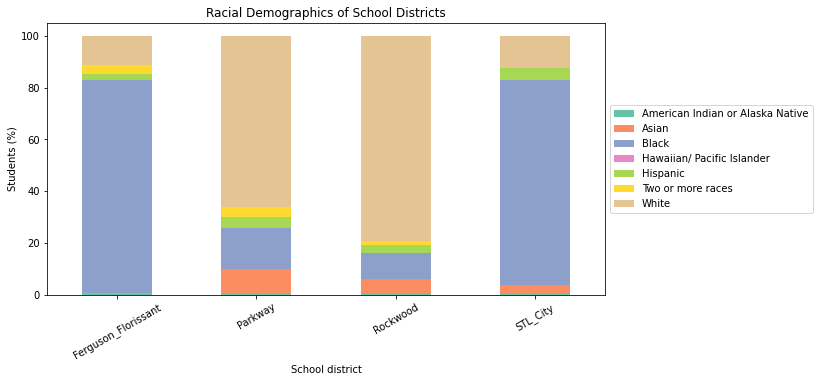

In [142]:
colors = sns.color_palette("Set2")
hs_race_counts_df.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked= True, figsize=(10,5), color =colors)
plt.title("Racial Demographics of School Districts")
plt.xlabel("School district")
plt.ylabel("Students (%)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig('Demographics_Schools.png')
plt.show()

## Discipline


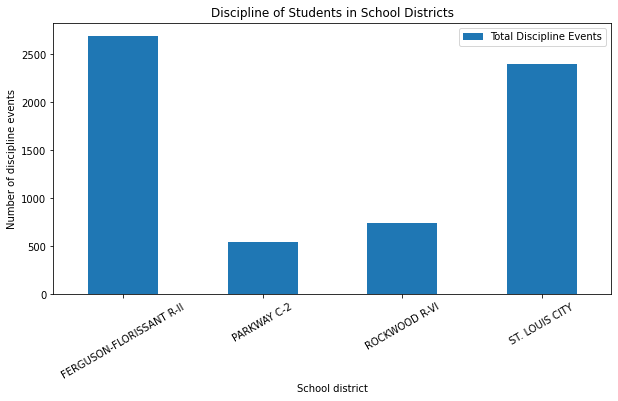

<Figure size 432x288 with 0 Axes>

In [133]:
colors = sns.color_palette()
discipline_count_df.plot(kind="bar", figsize=(10,5), color =colors)
plt.title("Discipline of Students in School Districts")
plt.xlabel("School district")
plt.ylabel("Number of discipline events")
plt.xticks(rotation=30, horizontalalignment="center")
plt.show()
plt.savefig('Discipline_Students_total.png')

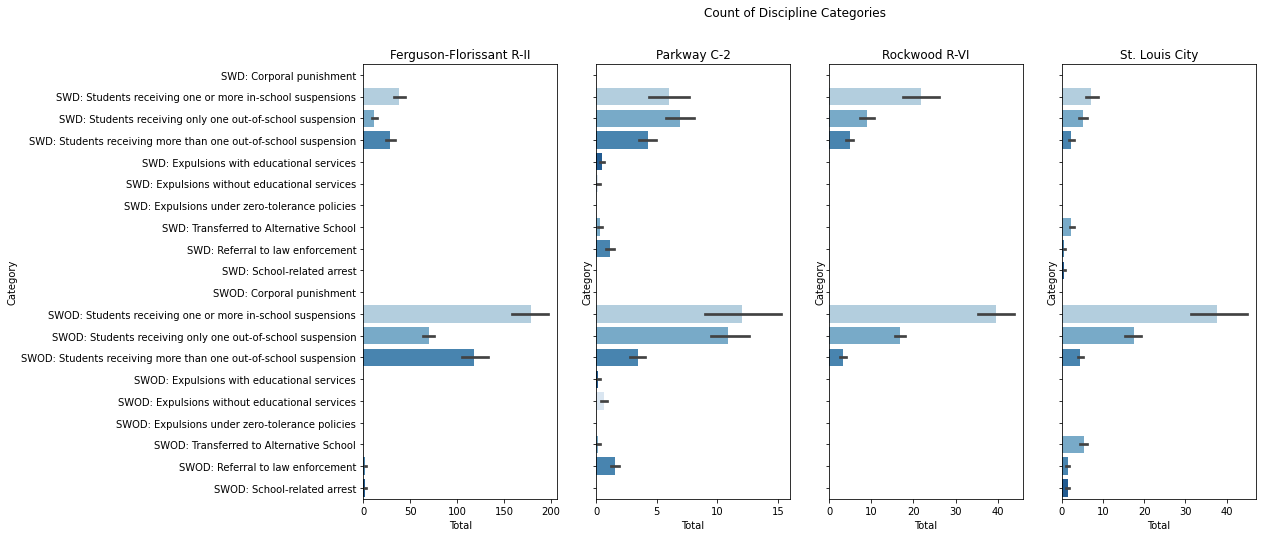

In [111]:
colors = sns.color_palette("Blues", len('Total')) 

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(16,8))
split_fig = total_discipline_df.set_index('LEA')
FF = split_fig.loc['FERGUSON-FLORISSANT R-II']
Park = split_fig.loc['PARKWAY C-2']
Rock = split_fig.loc['ROCKWOOD R-VI']
STL = split_fig.loc['ST. LOUIS CITY']

fig.suptitle('Count of Discipline Categories')

sns.barplot(ax= axes[0], x = FF.Total, y = FF.Category, data = split_fig, palette = colors).set_title('Ferguson-Florissant R-II')
sns.barplot(ax= axes[1], x = Park.Total, y = Park.Category, data = split_fig, palette = colors).set_title('Parkway C-2')
sns.barplot(ax= axes[2], x = Rock.Total, y = Rock.Category, data = split_fig, palette = colors).set_title('Rockwood R-VI')
sns.barplot(ax= axes[3], x = STL.Total, y = STL.Category, data = split_fig, palette = colors).set_title('St. Louis City')
total_discipline_df.Total.count()

plt.savefig('Discipline_Counts_District.png')

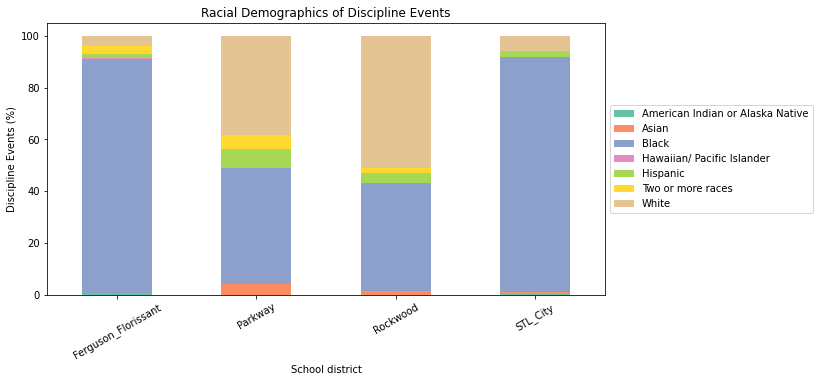

In [143]:
colors = sns.color_palette("Set2")
disc_race_ct_df.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked= True, figsize=(10,5), color =colors)
plt.title("Racial Demographics of Discipline Events")
plt.xlabel("School district")
plt.ylabel("Discipline Events (%)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig('Demographics_Discipline.png')
plt.show()


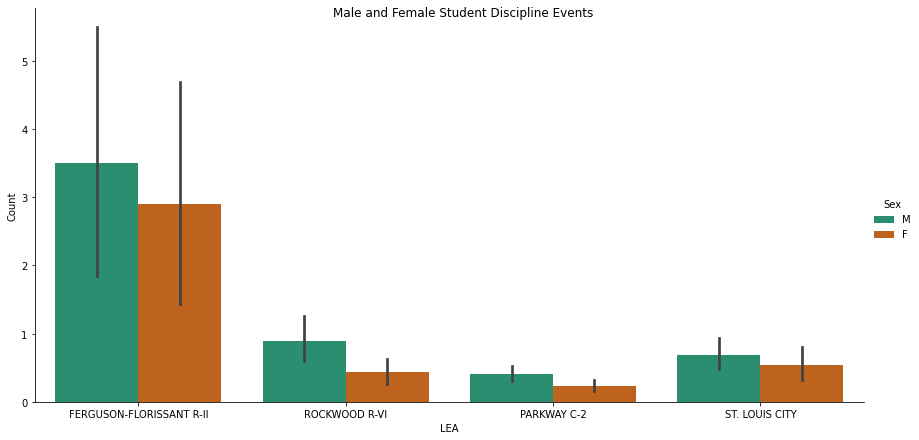

In [124]:
colors = sns.color_palette("Dark2")
g = sns.catplot(x = 'LEA', y = 'Count', hue='Sex', kind = 'bar', height=6, aspect=2, data = total_discipline_df, palette = colors)
g = g.fig.suptitle('Male and Female Student Discipline Events')
plt.savefig('M_F_Discipline.png')

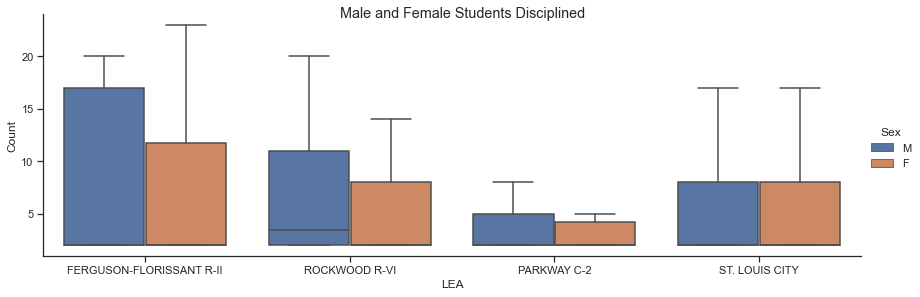

In [626]:
g = sns.catplot(x = 'LEA', y = 'Count', hue = 'Sex', data=total_discipline_df, 
                kind = "box", height= 4, aspect = 3, showfliers=False)
g= g.fig.suptitle('Male and Female Students Disciplined')

In [55]:
colors = sns.color_palette("Set3")
total_disc= pd.concat([discipline_count_df,total_df], axis =1)
total_disc=total_disc.transpose()
pie_total_disc = total_disc.plot.pie(subplots = True, figsize= (10, 10), autopct= '%.2f', labeldistance=None, layout= (2,2), title='Total Disciplined Students in Schools', colors = colors)


SyntaxError: invalid syntax (<ipython-input-55-7b6dafecd685>, line 4)

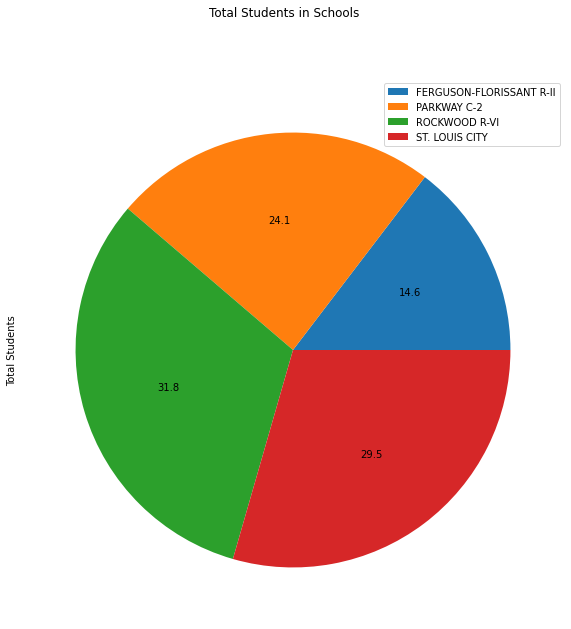

In [134]:
total_disc= pd.concat([discipline_count_df,total_df], axis =1)
total_disc=total_disc.transpose()
labels = ['Disciplined Students', 'Not Disciplined Students']
pie_total = total_df.plot.pie(subplots = True, figsize= (10, 10), autopct= '%1.1f', labeldistance=None, title='Total Students in Schools')#, labels= labels
plt.savefig('total_students_pie.png')


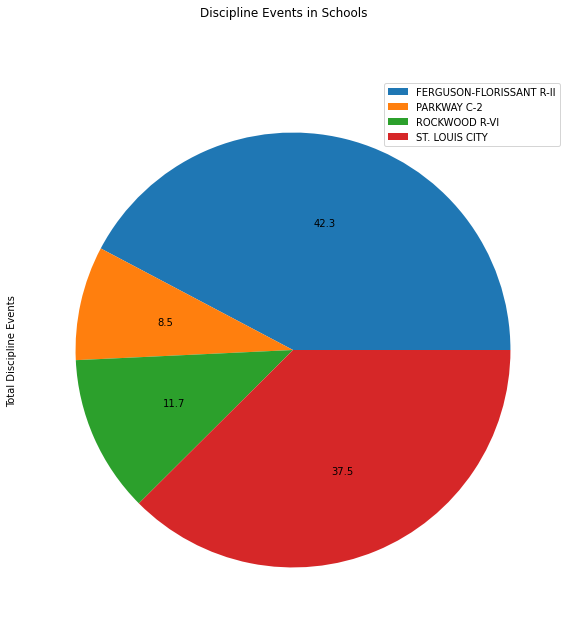

In [135]:
pie_total_disc = discipline_count_df.plot.pie(subplots = True, figsize= (10, 10), autopct= '%1.1f', labeldistance=None, title='Discipline Events in Schools')
plt.savefig('total_discipline_pie.png')

array([[<AxesSubplot:ylabel='Ferguson_Florissant'>,
        <AxesSubplot:ylabel='Parkway'>],
       [<AxesSubplot:ylabel='Rockwood'>, <AxesSubplot:ylabel='STL_City'>]],
      dtype=object)

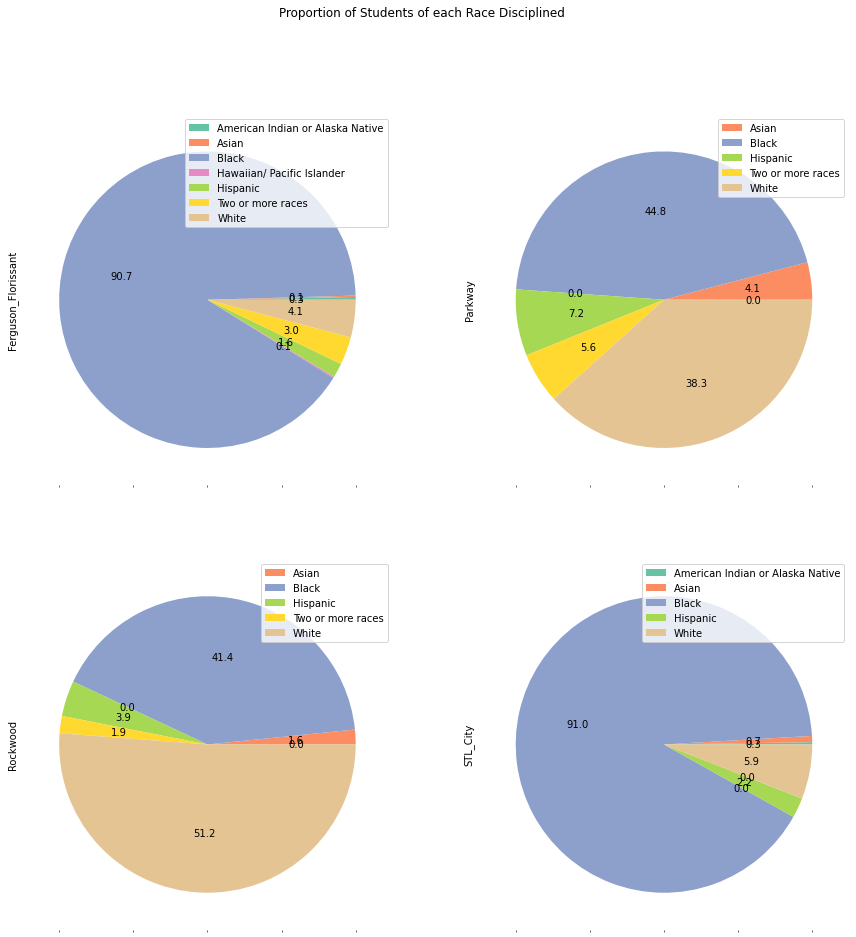

In [58]:
# I want to change this to a chart for each race and then how many were disciplined of each race
colors = sns.color_palette("Set2")
pie_race_disc = disc_race_ct_df.plot.pie(subplots = True, autopct= '%1.1f', figsize= (15, 15), layout = (2,2), labeldistance=None, title = 'Proportion of Students of each Race Disciplined', colors = colors)
pie_race_disc


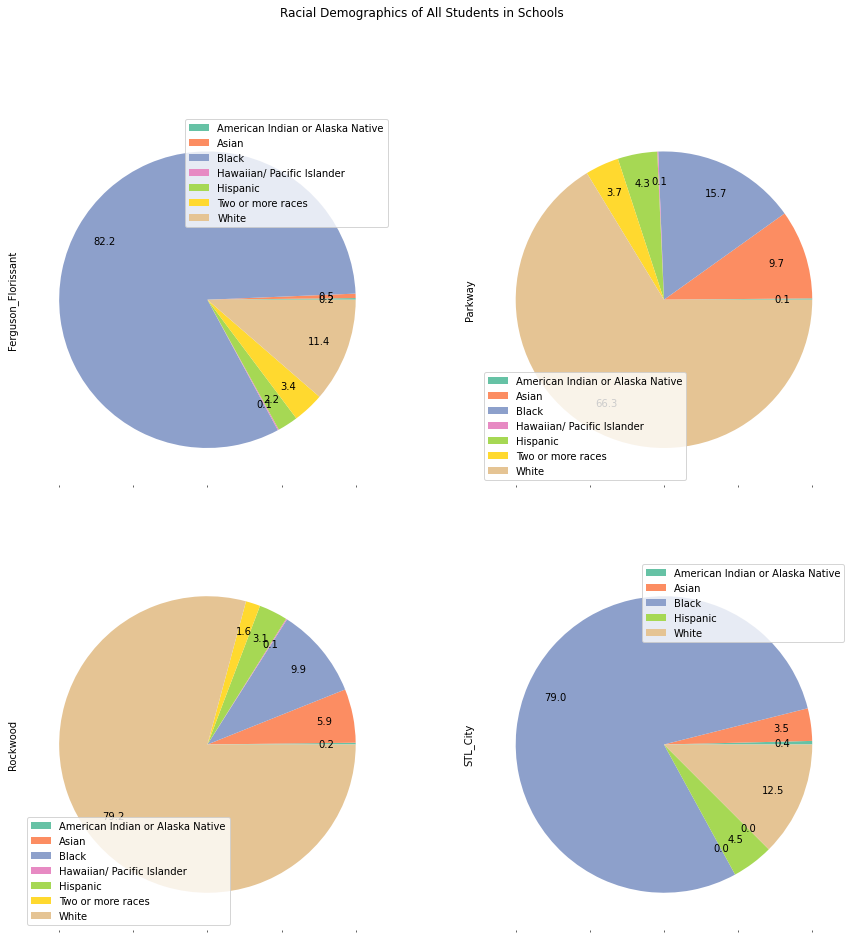

In [54]:
colors = sns.color_palette("Set2")
pie_race_total = hs_race_counts_df.plot.pie(subplots = True, figsize= (15, 15), layout = (2,2), autopct = '%1.1f', fontsize=10, labeldistance=None, pctdistance=.8, title= 'Racial Demographics of All Students in Schools', colors=colors)

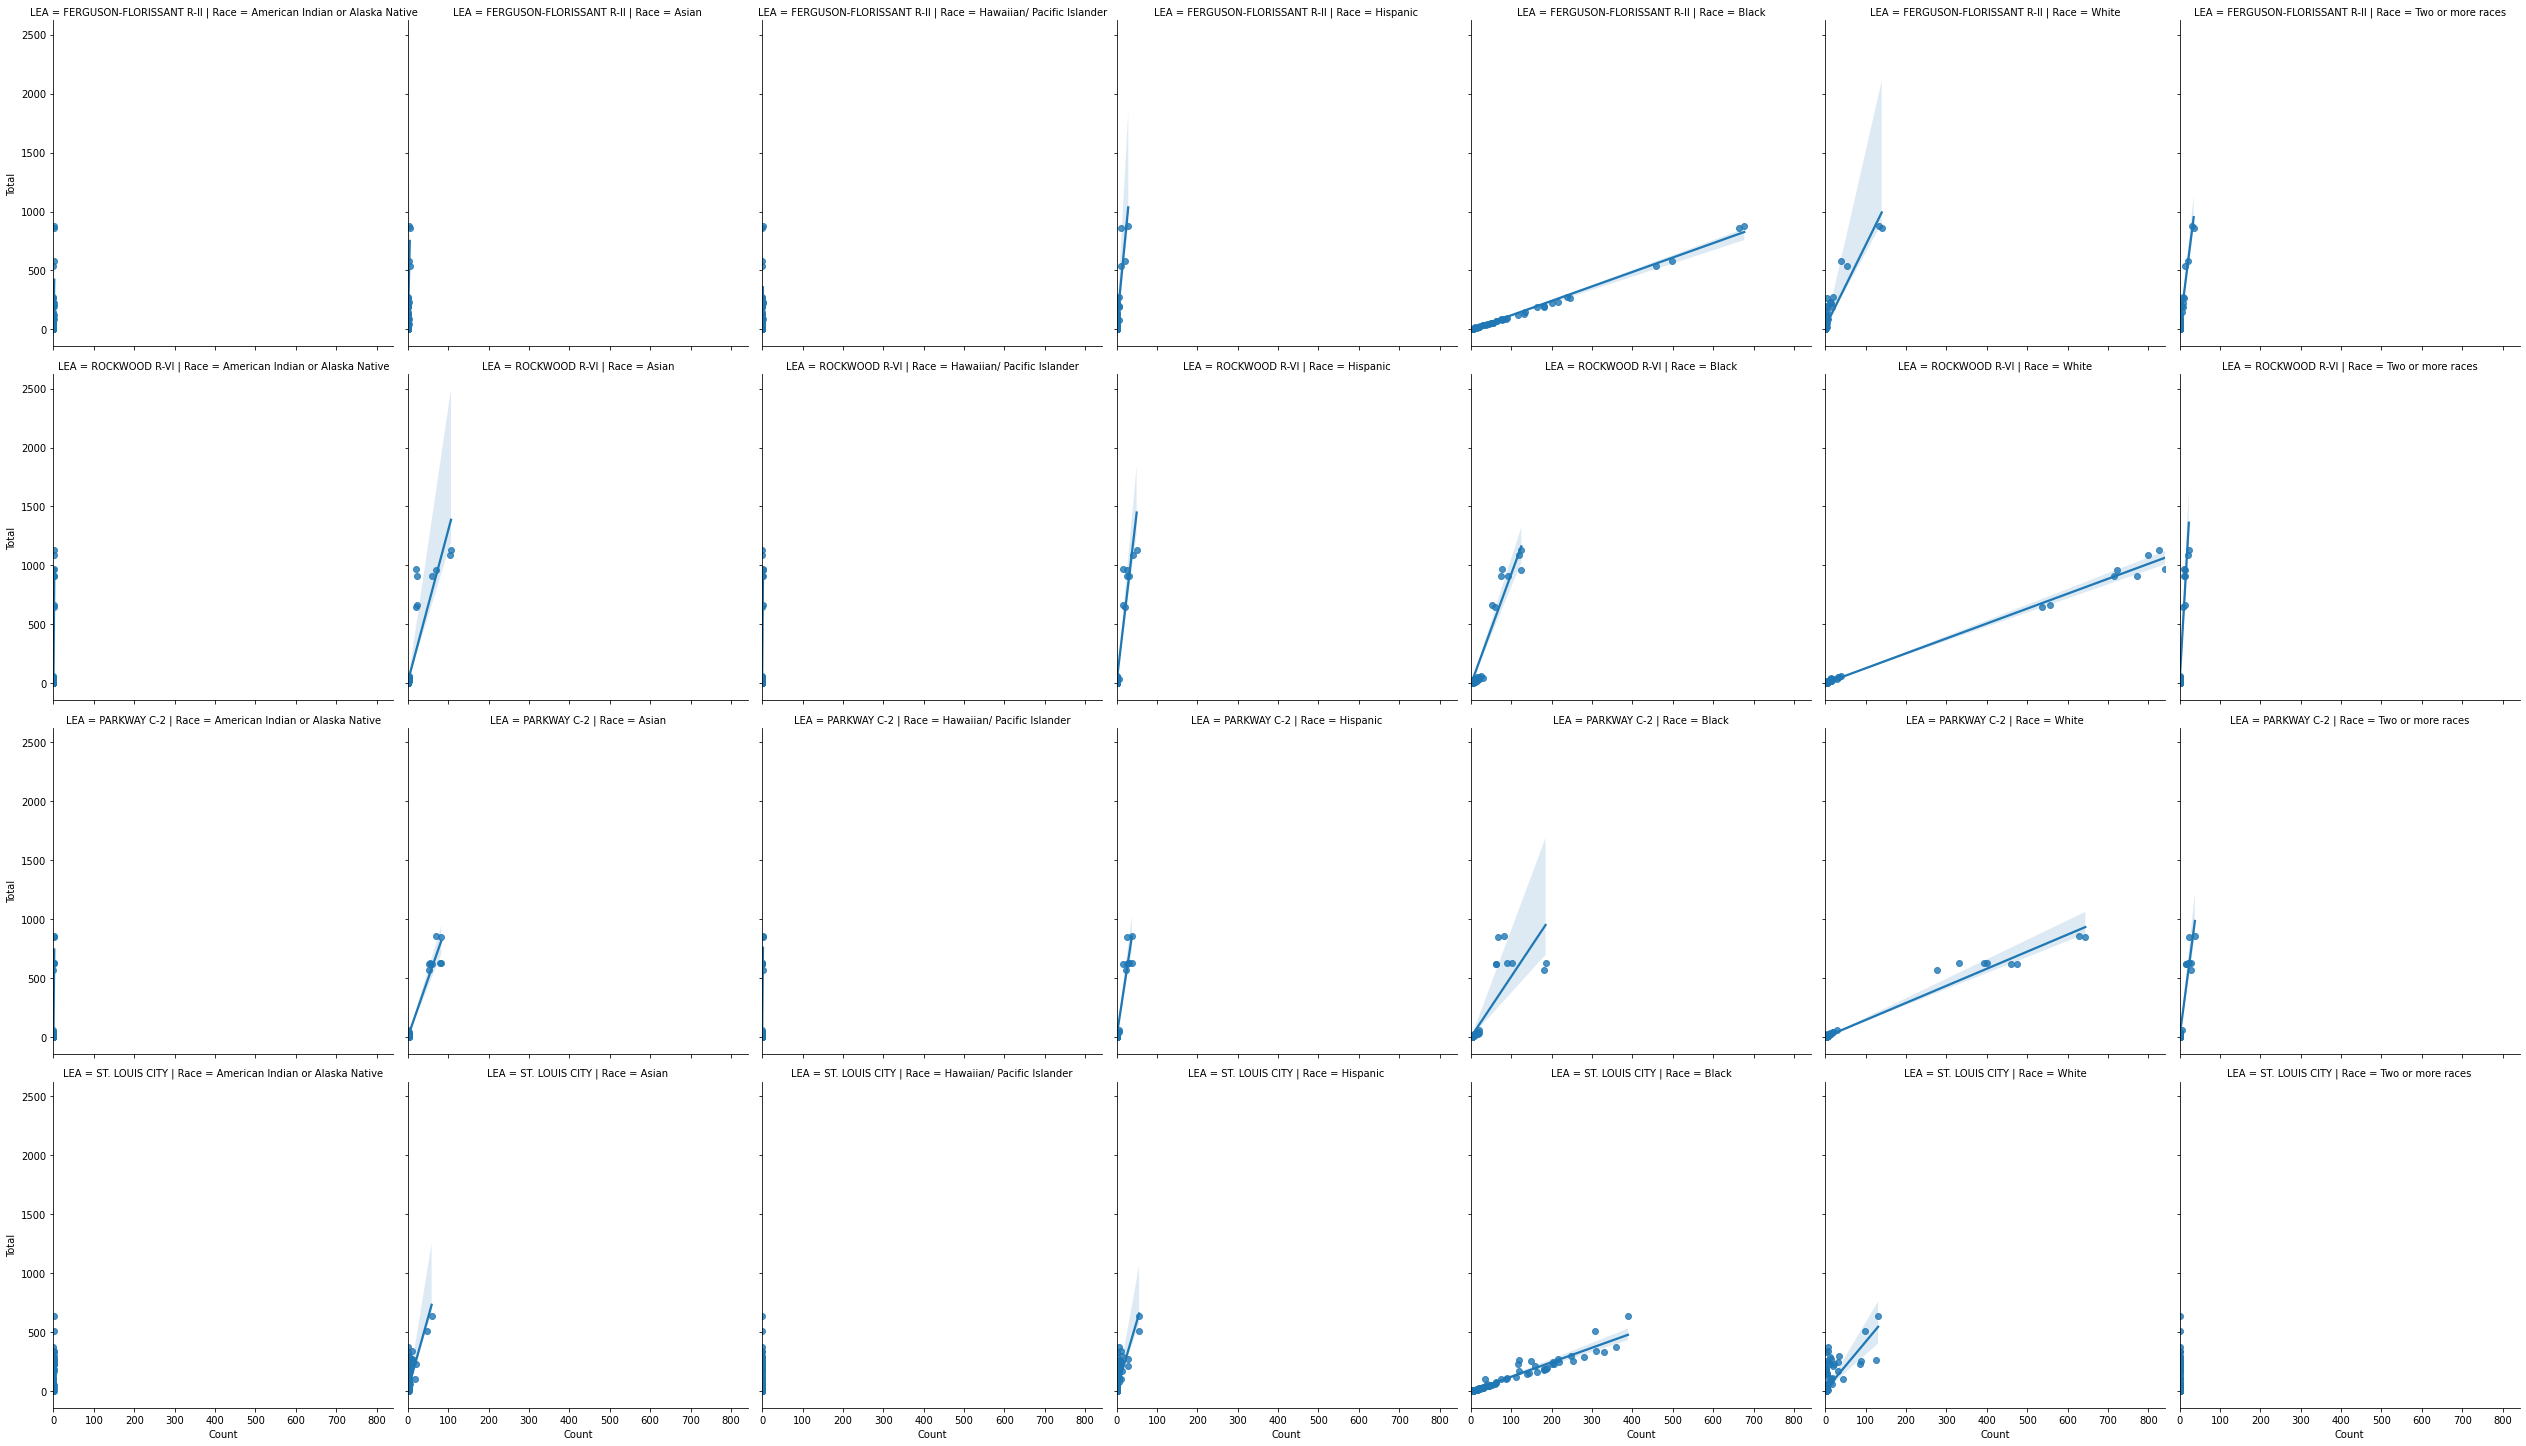

In [33]:
#discipline_scatter = sns.lmplot(x="Count", y="Total", col="Race", hue="LEA", data=total_discipline_df, col_wrap =4, height = 2, scatter_kws={"s": 3}).fig.suptitle('Number of Students Disciplined by Race vs. Total Number of Students Disciplined')
discipline_scatter = sns.lmplot(x="Count", y ="Total", col="Race", data = df_hs, row = "LEA", height = 5)
axes=discipline_scatter.axes
axes.shape
discipline_scatter


In [724]:
r_Ferguson_Florissant= round(hs_race_counts_df['Ferguson_Florissant'].corr(disc_race_ct_df['Ferguson_Florissant']),3)
r_STL_City = round(hs_race_counts_df['STL_City'].corr(disc_race_ct_df['STL_City']),3)
r_Parkway = round(hs_race_counts_df['Parkway'].corr(disc_race_ct_df['Parkway']),3)
r_Rockwood = round(hs_race_counts_df['Rockwood'].corr(disc_race_ct_df['Rockwood']),3)

print('The r values of racial demographic of all students and racial demographic of students disciplined:')
print(r_Ferguson_Florissant, 'for Ferguson-Florissant')
print(r_STL_City, 'for STL City')
print(r_Parkway,'for Parkway')
print(r_Rockwood,'for Rockwood')


The r values of racial demographic of all students and racial demographic of students disciplined:
0.996 for Ferguson-Florissant
0.996 for STL City
0.712 for Parkway
0.801 for Rockwood


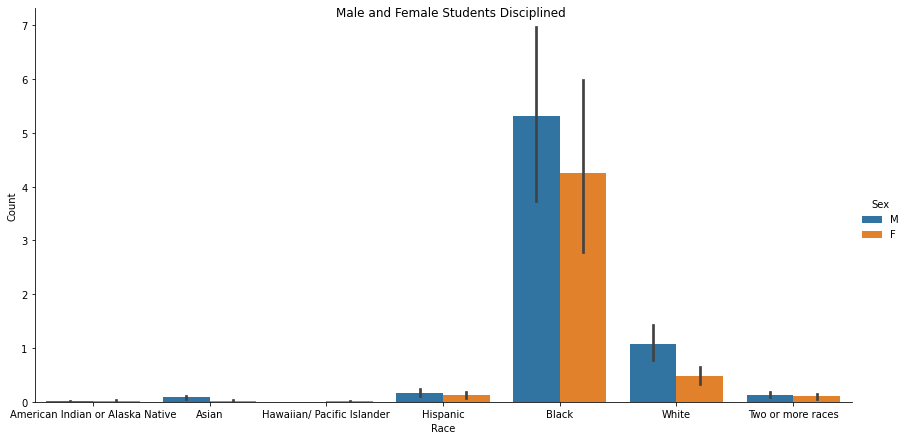

In [136]:
colors = sns.color_palette("Set2")
g = sns.catplot(x = 'Race', y = 'Count', hue='Sex', kind = 'bar', height=6, aspect=2, data = total_discipline_df)
g = g.fig.suptitle('Male and Female Students Disciplined')
#count is in hundreds

### Future Interest

In [79]:
total_rows_df
total_race_df = total_rows_df.groupby(['LEA'])(['Count'].agg([np.sum]))
total_race_df

AttributeError: 'list' object has no attribute 'agg'

In [ ]:
# # total_race_df = pd.concat([race_percent_df, disc_race_percent_df.reindex(race_percent_df.index)], axis =1)
# # total_race_df = total_race_df.drop(columns = ['Race','ID'])
# # total_race_df.head(10)


# sns.catplot(data = race_percent_df, x = 'Race', y = 'Percent', kind = 'scatter')
# plt.xticks(rotation=90, horizontalalignment="left")
# plt.ylabel('Number of Students (%)')
# plt.title('Racial Demographics of Students')
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

# sns.scatterplot(data = disc_race_percent_df)
# plt.xticks(rotation=90, horizontalalignment="left")
# plt.ylabel('Number of Students (%)')
# plt.title('Racial Demographics of Disciplined Students')
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()